In [5]:
import numpy as np
import pandas as pd

In [6]:
np.random.seed(42)

In [7]:

df = pd.read_csv('/content/Train.csv')
dataset = df.copy()
display(dataset)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Performing basic data cleaning


In [8]:
dataset = dataset.drop(columns = ['ID'])
dataset = dataset[dataset['Profession'].notna()]
dataset = dataset.fillna(0)
dataset = dataset.loc[(dataset[['Graduated', 'Gender', 'Ever_Married', 'Var_1']] != 0).all(axis=1)]


display(dataset)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [9]:
dataset_expanded = dataset.drop(columns = ['Segmentation'])
dataset_expanded = pd.get_dummies(dataset_expanded, sparse = True)
display(dataset_expanded)

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,38,0.0,3.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,67,1.0,1.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,67,0.0,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,40,0.0,6.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8064,35,3.0,4.0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8065,33,1.0,1.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
8066,27,1.0,4.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


We can see that we have around 28 features now


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
copy = dataset_expanded.copy()

scaler = StandardScaler()
scaler.fit(copy)
X_scale = scaler.transform(copy)
df_scale = pd.DataFrame(X_scale, columns=copy.columns)
display(df_scale)



,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,-1.288844,-0.412541,0.790981,-0.904760,0.904760,1.189081,-1.189081,1.298162,-1.298162,-0.68495,-0.308893,-0.310410,-0.368983,-0.285503,2.243620,-0.177406,-0.290811,-0.193942,-0.568466,-0.420224,0.806860,-0.129765,-0.236124,-0.331907,2.560403,-0.103319,-1.40404,-0.160246
1,-0.330085,-0.712880,0.163936,1.105265,-1.105265,-0.840986,0.840986,-0.770320,0.770320,-0.68495,-0.308893,3.221543,-0.368983,-0.285503,-0.445708,-0.177406,-0.290811,-0.193942,1.759119,-0.420224,-1.239373,-0.129765,-0.236124,-0.331907,2.560403,-0.103319,-1.40404,-0.160246
2,1.407665,-0.412541,-1.090154,1.105265,-1.105265,-0.840986,0.840986,-0.770320,0.770320,-0.68495,-0.308893,3.221543,-0.368983,-0.285503,-0.445708,-0.177406,-0.290811,-0.193942,-0.568466,-0.420224,0.806860,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246
3,1.407665,-0.712880,-0.463109,-0.904760,0.904760,-0.840986,0.840986,-0.770320,0.770320,-0.68495,-0.308893,-0.310410,-0.368983,-0.285503,-0.445708,-0.177406,3.438665,-0.193942,-0.568466,2.379685,-1.239373,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246
4,-0.210240,-0.712880,2.045070,1.105265,-1.105265,-0.840986,0.840986,-0.770320,0.770320,-0.68495,-0.308893,-0.310410,2.710155,-0.285503,-0.445708,-0.177406,-0.290811,-0.193942,-0.568466,2.379685,-1.239373,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,-0.150318,-0.712880,1.418025,-0.904760,0.904760,-0.840986,0.840986,-0.770320,0.770320,1.45996,-0.308893,-0.310410,-0.368983,-0.285503,-0.445708,-0.177406,-0.290811,-0.193942,-0.568466,2.379685,-1.239373,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246
7665,-0.509852,0.188138,0.790981,-0.904760,0.904760,1.189081,-1.189081,1.298162,-1.298162,-0.68495,-0.308893,-0.310410,-0.368983,3.502594,-0.445708,-0.177406,-0.290811,-0.193942,-0.568466,-0.420224,0.806860,-0.129765,-0.236124,-0.331907,2.560403,-0.103319,-1.40404,-0.160246
7666,-0.629697,-0.412541,-1.090154,1.105265,-1.105265,1.189081,-1.189081,-0.770320,0.770320,-0.68495,-0.308893,-0.310410,-0.368983,-0.285503,2.243620,-0.177406,-0.290811,-0.193942,-0.568466,-0.420224,0.806860,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246
7667,-0.989232,-0.412541,0.790981,1.105265,-1.105265,1.189081,-1.189081,-0.770320,0.770320,-0.68495,-0.308893,-0.310410,-0.368983,-0.285503,2.243620,-0.177406,-0.290811,-0.193942,-0.568466,-0.420224,0.806860,-0.129765,-0.236124,-0.331907,-0.390563,-0.103319,0.71223,-0.160246


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.1287897501946912


We can see that our Silhouette Score is extremely bad at 0.13 which suggests that there are too many features for KMeans



To solve this problem, we will be plotting a heatmap and see for what features the segmentation does not have a appreciable correlation so we can drop these features


In [14]:
dataset_heatmap = df.drop(columns = ['ID'])
dataset_heatmap = dataset_heatmap[dataset_heatmap['Profession'].notna()]
dataset_heatmap = dataset_heatmap.fillna(0)
dataset_heatmap = dataset_heatmap.loc[(dataset_heatmap[['Graduated', 'Gender', 'Ever_Married', 'Var_1']] != 0).all(axis=1)]

dataset_heatmap = pd.get_dummies(dataset_heatmap, sparse = True)
display(dataset_heatmap)

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,22,1.0,4.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,38,0.0,3.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,67,1.0,1.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,67,0.0,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,40,0.0,6.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
8064,35,3.0,4.0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
8066,27,1.0,4.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


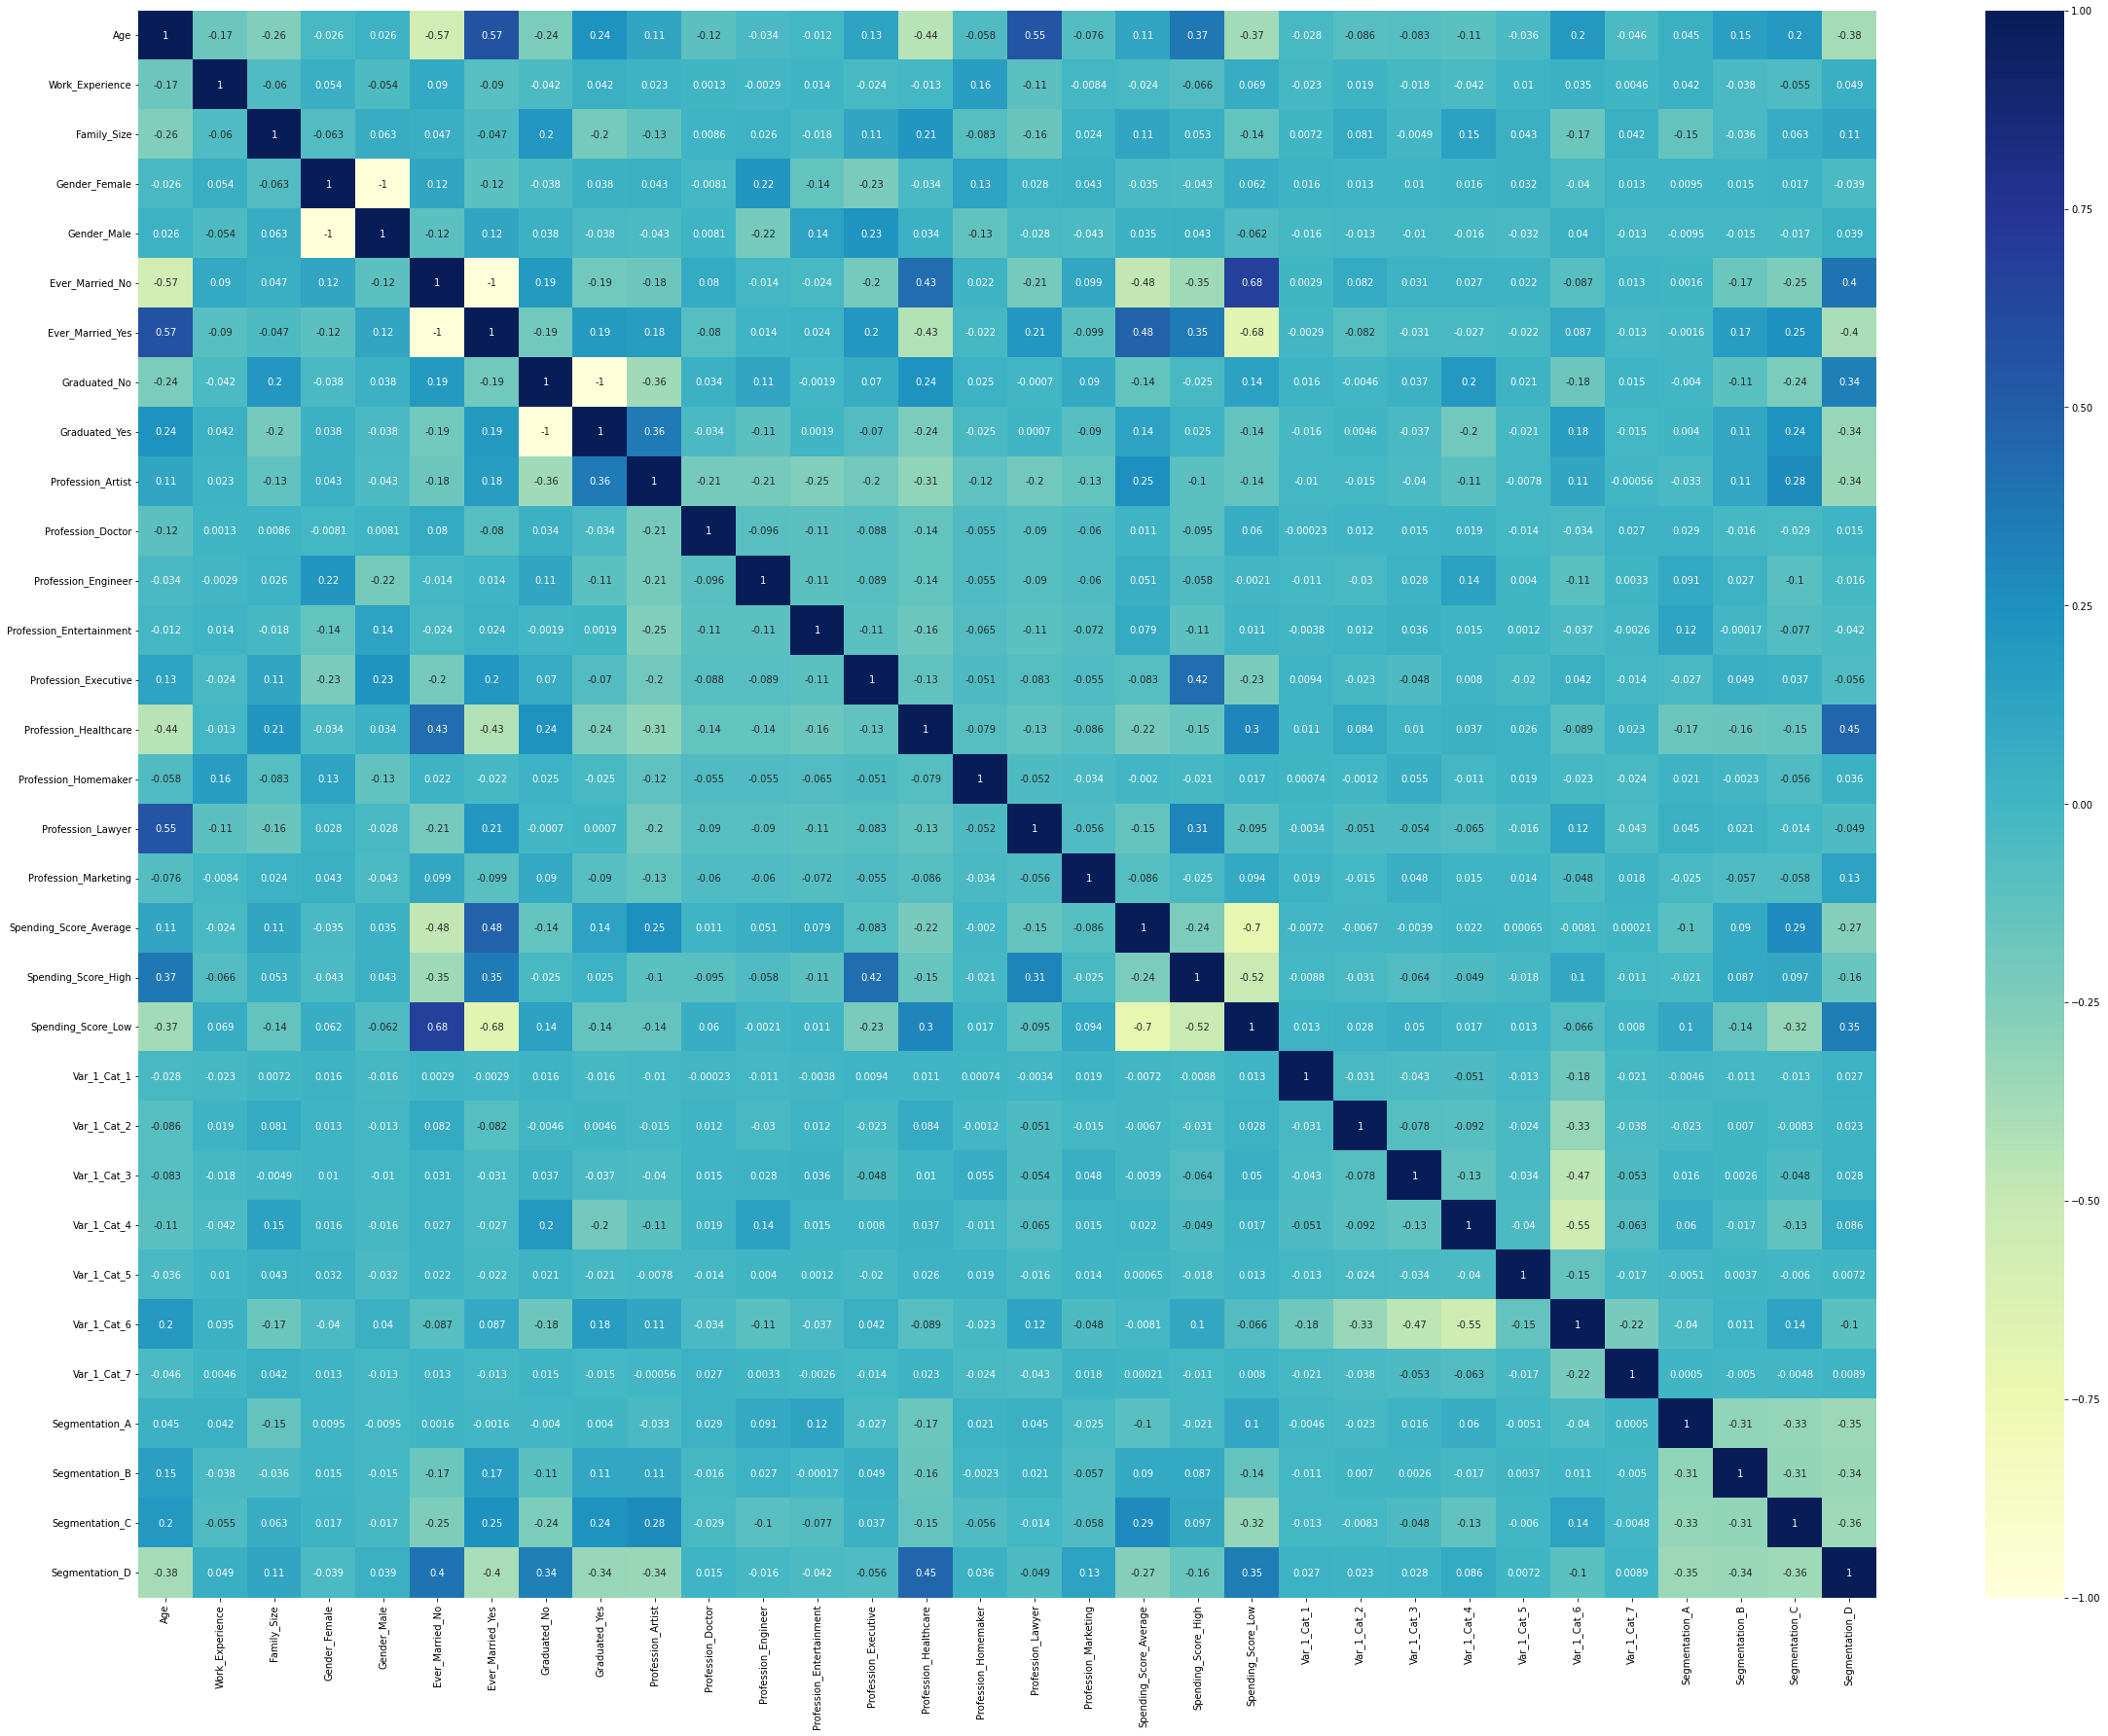

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 30))
  
# plotting correlation heatmap
dataplot = sns.heatmap(dataset_heatmap.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

We can see that the segmentation does not really depend on factors like Gender and Work Experience and the Var_1 column. <br>
That means we can drop these columns for further analysis

In [16]:
dataset_cleaned = df.drop(columns = ['ID','Gender', 'Work_Experience', 'Var_1', 'Segmentation'])
dataset_cleaned = dataset_cleaned[dataset_cleaned['Profession'].notna()]
dataset_cleaned = dataset_cleaned.loc[(dataset_cleaned[['Graduated', 'Ever_Married']] != 0).all(axis=1)]
dataset_cleaned.Graduated.replace(('Yes', 'No'), (1, 0), inplace=True)
dataset_cleaned.Ever_Married.replace(('Yes', 'No'), (1, 0), inplace=True)
dataset_cleaned = dataset_cleaned.dropna()
display(dataset_cleaned)

,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,0.0,22,0.0,Healthcare,Low,4.0
1,1.0,38,1.0,Engineer,Average,3.0
2,1.0,67,1.0,Engineer,Low,1.0
3,1.0,67,1.0,Lawyer,High,2.0
4,1.0,40,1.0,Entertainment,High,6.0
...,...,...,...,...,...,...
8062,1.0,41,1.0,Artist,High,5.0
8064,0.0,35,0.0,Executive,Low,4.0
8065,0.0,33,1.0,Healthcare,Low,1.0
8066,0.0,27,1.0,Healthcare,Low,4.0


In [17]:
dataset_cleaned = pd.get_dummies(dataset_cleaned, sparse = True)


In [18]:
display(dataset_cleaned)

,Ever_Married,Age,Graduated,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0.0,22,0.0,4.0,0,0,0,0,0,1,0,0,0,0,0,1
1,1.0,38,1.0,3.0,0,0,1,0,0,0,0,0,0,1,0,0
2,1.0,67,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,1
3,1.0,67,1.0,2.0,0,0,0,0,0,0,0,1,0,0,1,0
4,1.0,40,1.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1.0,41,1.0,5.0,1,0,0,0,0,0,0,0,0,0,1,0
8064,0.0,35,0.0,4.0,0,0,0,0,1,0,0,0,0,0,0,1
8065,0.0,33,1.0,1.0,0,0,0,0,0,1,0,0,0,0,0,1
8066,0.0,27,1.0,4.0,0,0,0,0,0,1,0,0,0,0,0,1


We've successfully managed to reduce the dataset to 16 features from 28


In [19]:
copy2 = dataset_cleaned.copy()

scaler2 = StandardScaler()
scaler2.fit(copy2)
X_scale2 = scaler2.transform(copy2)
df_scale3 = pd.DataFrame(X_scale2, columns=copy2.columns)
display(df_scale3)



,Ever_Married,Age,Graduated,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,-1.205933,-1.295875,-1.304342,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321
1,0.829233,-0.332744,0.766670,0.100015,-0.691964,-0.309277,3.22248,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,1.731119,-0.425367,-1.216070
2,0.829233,1.412930,0.766670,-1.210135,-0.691964,-0.309277,3.22248,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321
3,0.829233,1.412930,0.766670,-0.555060,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,-0.443092,-0.170499,3.453794,-0.191508,-0.577661,2.350910,-1.216070
4,0.829233,-0.212353,0.766670,2.065239,-0.691964,-0.309277,-0.31032,2.716811,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,2.350910,-1.216070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,0.829233,-0.152157,0.766670,1.410164,1.445162,-0.309277,-0.31032,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,2.350910,-1.216070
7430,-1.205933,-0.513331,-1.304342,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,3.470174,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321
7431,-1.205933,-0.633723,0.766670,-1.210135,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321
7432,-1.205933,-0.994897,0.766670,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321


In [20]:
df_scale4 = df_scale3.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale4)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale4, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale4, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)


KMeans Scaled Silhouette Score: 0.23238024254207695


We can see a clear increase in our silhouette score to 0.23 from 0.13


In [21]:
display(clusters_scale)

,Ever_Married,Age,Graduated,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,cluster_scaled
0,-1.205933,-1.295875,-1.304342,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321,3
1,0.829233,-0.332744,0.766670,0.100015,-0.691964,-0.309277,3.22248,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,1.731119,-0.425367,-1.216070,2
2,0.829233,1.412930,0.766670,-1.210135,-0.691964,-0.309277,3.22248,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321,1
3,0.829233,1.412930,0.766670,-0.555060,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,-0.443092,-0.170499,3.453794,-0.191508,-0.577661,2.350910,-1.216070,0
4,0.829233,-0.212353,0.766670,2.065239,-0.691964,-0.309277,-0.31032,2.716811,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,2.350910,-1.216070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,0.829233,-0.152157,0.766670,1.410164,1.445162,-0.309277,-0.31032,-0.368079,-0.288170,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,2.350910,-1.216070,0
7430,-1.205933,-0.513331,-1.304342,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,3.470174,-0.443092,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321,1
7431,-1.205933,-0.633723,0.766670,-1.210135,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321,3
7432,-1.205933,-0.994897,0.766670,0.755089,-0.691964,-0.309277,-0.31032,-0.368079,-0.288170,2.256866,-0.170499,-0.289537,-0.191508,-0.577661,-0.425367,0.822321,3


Try to perfrom elbow, other methods to find suitable clusters


# PCA optional section


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(df_scale4)
reduced = pca.transform(df_scale4)

In [27]:
print(reduced.shape)

(7434, 12)


# T-SNE

In [28]:
from sklearn.manifold import TSNE 
import timeit

# Two Dimensional Plot


In [29]:
start = timeit.default_timer()
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=5000, learning_rate=200, random_state = 42)

tsne_scale_results = tsne.fit_transform(copy2)
end = timeit.default_timer()
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
print('t-SNE done! Time elapsed: {} seconds'.format(end-start))

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 7434 samples in 0.018s...
[t-SNE] Computed neighbors for 7434 samples in 0.582s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7434
[t-SNE] Computed conditional probabilities for sample 2000 / 7434
[t-SNE] Computed conditional probabilities for sample 3000 / 7434
[t-SNE] Computed conditional probabilities for sample 4000 / 7434
[t-SNE] Computed conditional probabilities for sample 5000 / 7434
[t-SNE] Computed conditional probabilities for sample 6000 / 7434
[t-SNE] Computed conditional probabilities for sample 7000 / 7434
[t-SNE] Computed conditional probabilities for sample 7434 / 7434
[t-SNE] Mean sigma: 0.967803
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.149101
[t-SNE] KL divergence after 5000 iterations: 0.692845
t-SNE done! Time elapsed: 368.51054587999994 seconds


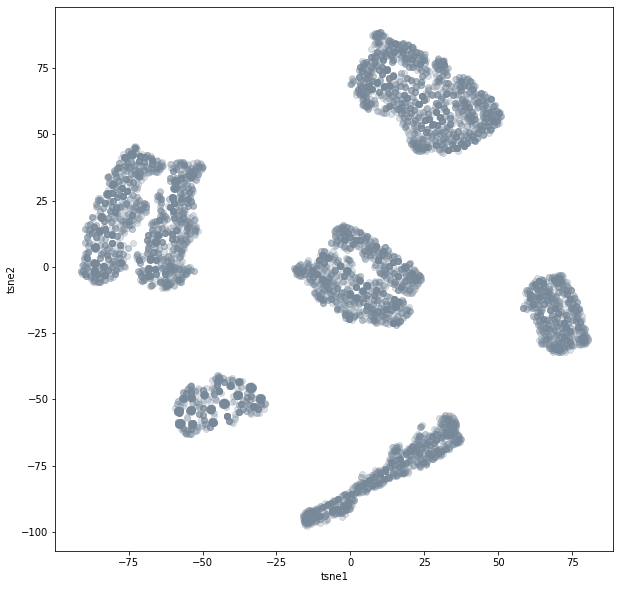

In [30]:
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [31]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=800, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.5922470688819885


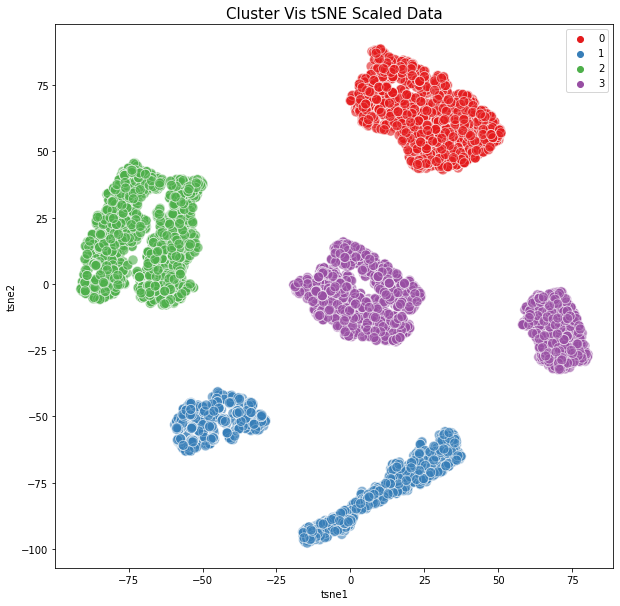

In [32]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = clusters_tsne_scale.iloc[:,0],y = clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [41]:
from sklearn.decomposition import PCA

In [46]:
start = timeit.default_timer()
pca = PCA(n_components = 2, random_state = 42) 
pca_scale_results = pca.fit_transform(copy2)
end = timeit.default_timer()
pca_df_scale = pd.DataFrame(pca_scale_results, columns=['pc1', 'pc2'])
print('t-SNE done! Time elapsed: {} seconds'.format(end-start))
print(pca.explained_variance_ratio_)

t-SNE done! Time elapsed: 0.03451279799992335 seconds
[0.98642641 0.00779754]


In [43]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=800, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.5286711782004786


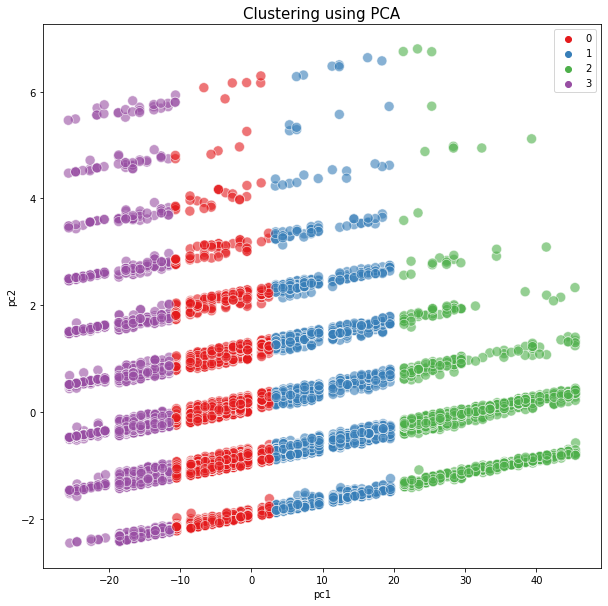

In [44]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = clusters_pca_scale.iloc[:,0],y = clusters_pca_scale.iloc[:,1],hue=labels_pca_scale, palette='Set1', s=100, alpha=0.6).set_title('Clustering using PCA', fontsize=15)
plt.legend()
plt.show()

# 3 Dimensional Plot

In [33]:
start = timeit.default_timer()
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200, random_state = 42)

tsne_scale_results = tsne.fit_transform(copy2)
end = timeit.default_timer()
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
print('t-SNE done! Time elapsed: {} seconds'.format(end-start))

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 7434 samples in 0.018s...
[t-SNE] Computed neighbors for 7434 samples in 0.618s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7434
[t-SNE] Computed conditional probabilities for sample 2000 / 7434
[t-SNE] Computed conditional probabilities for sample 3000 / 7434
[t-SNE] Computed conditional probabilities for sample 4000 / 7434
[t-SNE] Computed conditional probabilities for sample 5000 / 7434
[t-SNE] Computed conditional probabilities for sample 6000 / 7434
[t-SNE] Computed conditional probabilities for sample 7000 / 7434
[t-SNE] Computed conditional probabilities for sample 7434 / 7434
[t-SNE] Mean sigma: 0.967803
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.717396
[t-SNE] KL divergence after 5000 iterations: 0.559766
t-SNE done! Time elapsed: 1293.319928696 seconds


In [34]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=800, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.44695645570755005


In [35]:
import plotly.graph_objs as go

In [36]:
Scene = dict(xaxis = dict(title  = 'tsne1'),yaxis = dict(title  = 'tsne2'),zaxis = dict(title  = 'tsne3'))
labels = labels_tsne_scale
trace = go.Scatter3d(x=clusters_tsne_scale.iloc[:,0], y=clusters_tsne_scale.iloc[:,1], z=clusters_tsne_scale.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [48]:
start = timeit.default_timer()
pca = PCA(n_components = 3, random_state = 42) 
pca_scale_results = pca.fit_transform(copy2)
end = timeit.default_timer()
pca_df_scale = pd.DataFrame(pca_scale_results, columns=['pc1', 'pc2', 'pc3'])
print('PCA done! Time elapsed: {} seconds'.format(end-start))
print(pca.explained_variance_ratio_)

PCA done! Time elapsed: 0.04889983300017775 seconds
[0.98642641 0.00779754 0.00162805]


In [49]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=800, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.5225822486130006


In [50]:
Scene = dict(xaxis = dict(title  = 'pc1'),yaxis = dict(title  = 'pc2'),zaxis = dict(title  = 'pc3'))
labels = labels_pca_scale
trace = go.Scatter3d(x=clusters_pca_scale.iloc[:,0], y=clusters_pca_scale.iloc[:,1], z=clusters_pca_scale.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()